# Basis for Scikit-Learn Ensemble Model Support

In this notebook we explore Ensemble Models already implemented by Scikit-Learn, focusing on the RandomForestClassifier and RandomForestRegressor. 

RandomForestClassifier and RandomForestRegressor build many decision trees on random subsets of the data and features, then combine their predictions through voting (classification) or averaging (regression) to reduce variance and improve generalization compared to a single tree.

The goal of this notebook is:

- to explain the concepts behind the RandomForestClassifier (RFC) and RandomForestRegressor (RFR),
- to train and eveluate RFC and RFR,
- to understand important hyperparameters
- to first attempt an implementetion of RFC and RFR

Notebook Structure:

1. Concepts: Decision Trees, Random Forests
2. RandomForestClassifier: Classifying Dataset,


## 1. Imports and Setup

In [ ]:
# Imports and setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

/Users/shane/probly/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


## 2. Concepts: Decision Trees, Random Forests
### 2.1 Decision Trees

Decision Trees are supervised learning algorithms used for Classification and Regression.

Primary Implementations:
- DecisionTreeClassifier (Base Estimator for RandomForestClassifier)
- DecisionTreeRegressor (Base Estimator for RandomforestRegressor)



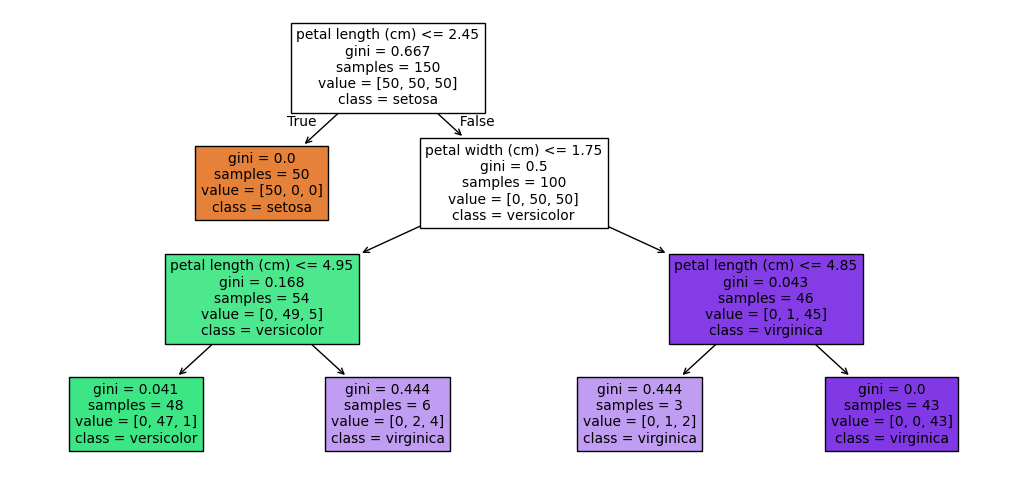

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
x = iris.data
y = iris.target


model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)

plt.figure("Decision Tree", figsize=[13, 6])
plot_tree(model, fontsize=10, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 2.2 Random Forests

Random Forests are ensembles of Decision Trees:

- each individual tree is trained on *bootstrap sample* of the data
- at each split, the tree only consdiers a *random subste of features*

Benefits:

- reduce variance compared to a single tree
- generally strong accuracy

## 3. RandomForestClassifier: Classifying Datasets

Shape: (569, 30)
Train size: 455
Test size: 114
Test accuracy: 0.956140350877193
Confusion matrix:
 [[39  3]
 [ 2 70]]

Classification report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



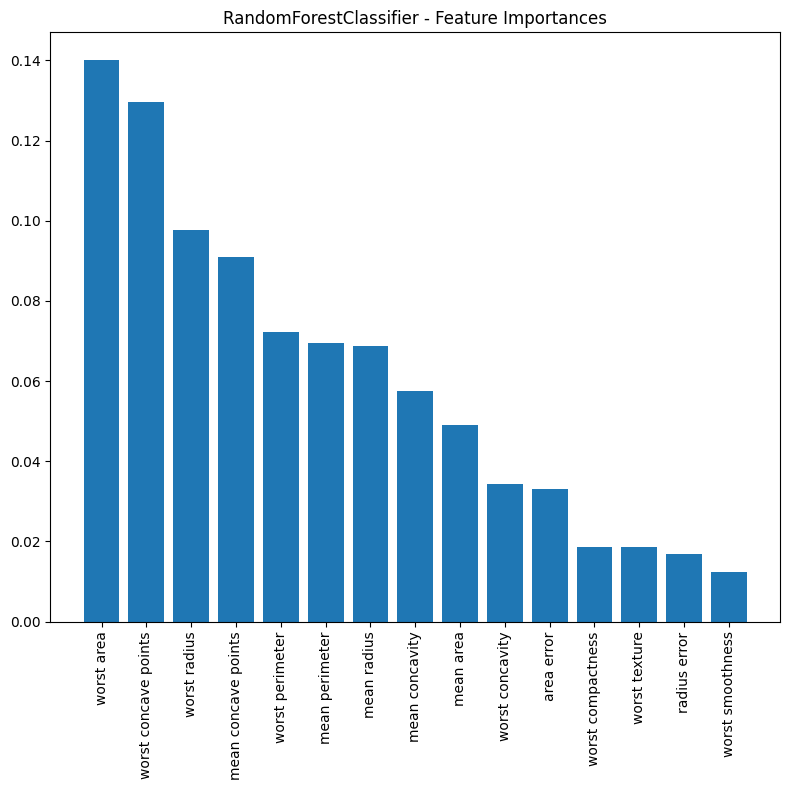

In [4]:
# Loading classification dataset

cancer = load_breast_cancer()
X_clf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_clf = pd.Series(cancer.target, name="target")

print("Shape:", X_clf.shape)
X_clf.head()

# Train-test split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf,
    y_clf,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_clf,
)

print("Train size:", Xc_train.shape[0])
print("Test size:", Xc_test.shape[0])

# Baseline RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

rf_clf.fit(Xc_train, yc_train)

yc_pred = rf_clf.predict(Xc_test)

print("Test accuracy:", accuracy_score(yc_test, yc_pred))

# Confusion matrix and classification report

cm = confusion_matrix(yc_test, yc_pred)
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(yc_test, yc_pred, target_names=cancer.target_names))


# Feature importance plot for classifier

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 8))
plt.title("RandomForestClassifier - Feature Importances")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), X_clf.columns[indices][:15], rotation=90)
plt.tight_layout()
plt.show()

## RandomForestRegressor 

Shape: (442, 10)
Train size: 353
Test size: 89
R^2: 0.4428225673999313
MSE: 2952.0105887640448
RMSE: 54.332408273184846
MAE: 44.053033707865175


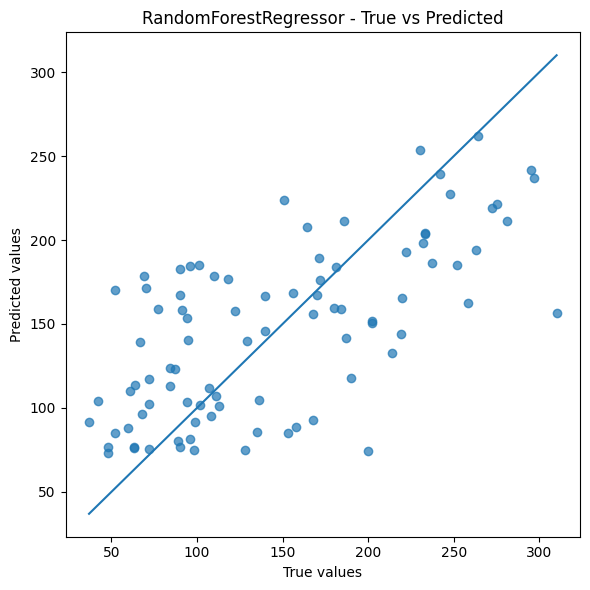

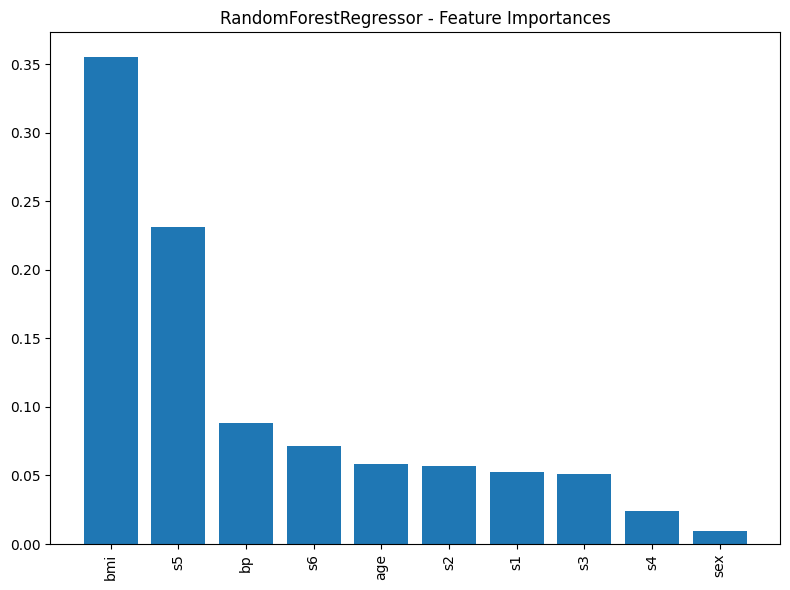

In [5]:
# Load regression dataset

diabetes = load_diabetes()
X_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_reg = pd.Series(diabetes.target, name="target")

print("Shape:", X_reg.shape)
X_reg.head()

# Train-test split for regression

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=RANDOM_STATE,
)

print("Train size:", Xr_train.shape[0])
print("Test size:", Xr_test.shape[0])

rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

rf_reg.fit(Xr_train, yr_train)

yr_pred = rf_reg.predict(Xr_test)

r2 = r2_score(yr_test, yr_pred)
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yr_test, yr_pred)

print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

plt.figure(figsize=(6, 6))
plt.scatter(yr_test, yr_pred, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("RandomForestRegressor - True vs Predicted")
# ideal line
min_val = min(yr_test.min(), yr_pred.min())
max_val = max(yr_test.max(), yr_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.tight_layout()
plt.show()

reg_importances = rf_reg.feature_importances_
reg_indices = np.argsort(reg_importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("RandomForestRegressor - Feature Importances")
plt.bar(range(len(reg_indices)), reg_importances[reg_indices], align="center")
plt.xticks(range(len(reg_indices)), X_reg.columns[reg_indices], rotation=90)
plt.tight_layout()
plt.show()